In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the diamonds dataset
data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Generate Key Statistics
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
# One hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first')
data_object = data.select_dtypes('object')
encoder.fit(data_object)

codes = encoder.transform(data_object).toarray()
feature_names = encoder.get_feature_names_out(data_object.columns)

data_encoded = pd.concat([data.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

data_encoded.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


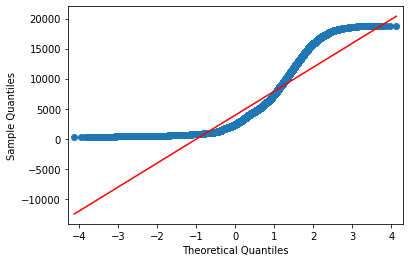

In [5]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(data_encoded['price'],line='s')
pylab.show()

In [6]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(data_encoded['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.798, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
#Define x and y variable
x = data_encoded.drop(['price'],axis=1).to_numpy()
y = data_encoded['price'].to_numpy()

In [8]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [9]:
#Create Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\n Regression Model - using OneHotEncoder')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         data_encoded.drop(['price'],axis=1).columns,
                         columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


 Regression Model - using OneHotEncoder

Method: Linear regression

Intercept: 3945.97
               Coefficients
carat           5423.170294
depth            -91.829051
table            -58.169284
x              -1190.321358
y                  5.334533
z                -50.839380
cut_Good         180.516501
cut_Ideal        434.958779
cut_Premium      355.008044
cut_Very Good    322.900758
color_E          -77.688697
color_F          -94.109194
color_G         -189.291421
color_H         -350.376438
color_I         -439.321748
color_J         -529.482578
clarity_IF       938.247424
clarity_SI1     1561.600196
clarity_SI2     1003.923103
clarity_VS1     1641.652097
clarity_VS2     1774.775673
clarity_VVS1    1246.722571
clarity_VVS2    1437.893300

R2: 0.92
Adj_R2: 0.92
Mean Absolute Error: 732.62
Mean Squared Error: 1284446.80
Root Mean Squared Error: 1133.33
